In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
import pandas as pd
b = pd.read_csv("b_features_2.csv")
print(b.size)
#lx = lx[(lx["eta_error_s"] <= 1000) | (lx["pred_eta_s"] <= 60)]
#lx = lx[lx["eta_error_s"] <= 1100]
print(b.size)

6346605
6346605


In [202]:
y = b["eta_error_s"].dropna()

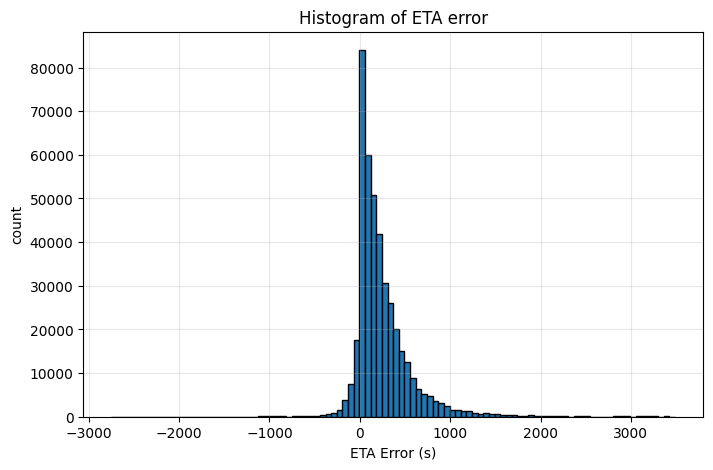

In [203]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(y, bins=100, color="C0", edgecolor="black")
plt.xlabel("ETA Error (s)")
plt.ylabel("count")
plt.title("Histogram of ETA error")
plt.grid(alpha=0.3)
plt.show()

In [204]:
def series_without_outliers(series, k=1.5):
    s = series.dropna()
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    low, high = q1 - k * iqr, q3 + k * iqr
    return series.between(low, high) | series.isna()
clean = b.copy()
eta_error_no_outliers = series_without_outliers(clean["eta_error_s"], k=1.5)
speed_no_outliers = series_without_outliers(clean["speed_prev_mps"], k=1.5)
clean = clean[eta_error_no_outliers & speed_no_outliers].reset_index(drop=True)

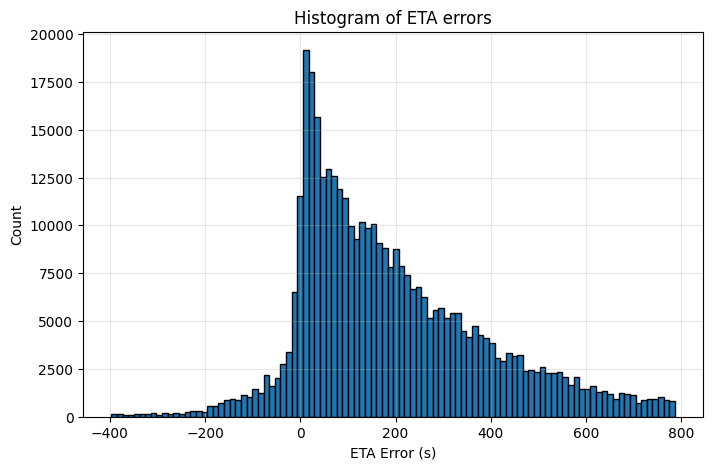

In [205]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(clean["eta_error_s"], bins=100, edgecolor="black")
plt.xlabel("ETA Error (s)")
plt.ylabel("Count")
plt.title("Histogram of ETA errors")
plt.grid(alpha=0.3)
plt.show()

In [206]:
b_sample = clean.sample(n=10000, random_state=42)
y_sample = b_sample["eta_error_s"].dropna()

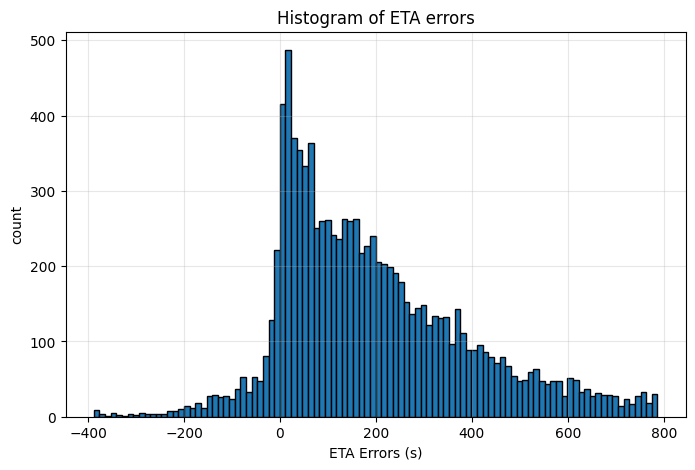

In [207]:
plt.figure(figsize=(8,5))
plt.hist(y_sample, bins=100, edgecolor="black")
plt.xlabel("ETA Errors (s)")
plt.ylabel("count")
plt.title("Histogram of ETA errors")
plt.grid(alpha=0.3)
plt.show()

In [208]:
paired = b_sample[["pred_eta_s", "eta_error_s"]].dropna()
x_sample = paired["pred_eta_s"]
y_sample = paired["eta_error_s"]

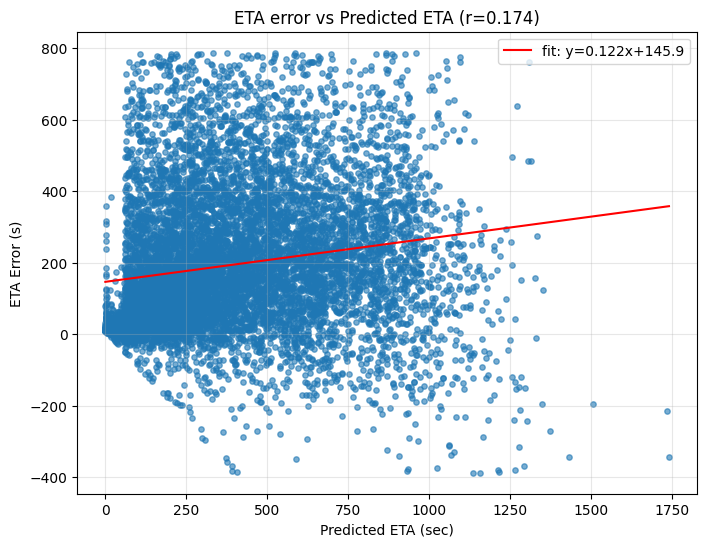

In [209]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=15, alpha=0.6)
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)
x_points = np.linspace(np.nanmin(x), np.nanmax(x), 100)
plt.plot(x_points, linear_model(x_points), color="red", label=f"fit: y={coefficients[0]:.3f}x+{coefficients[1]:.1f}")

r = np.corrcoef(x, y)[0,1] if x.size > 1 else np.nan
plt.xlabel("Predicted ETA (sec)")
plt.ylabel("ETA Error (s)")
plt.title(f"ETA error vs Predicted ETA (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [210]:
paired = b_sample[["pax_load", "eta_error_s"]].dropna()
x_sample = paired["pax_load"]
y_sample = paired["eta_error_s"]

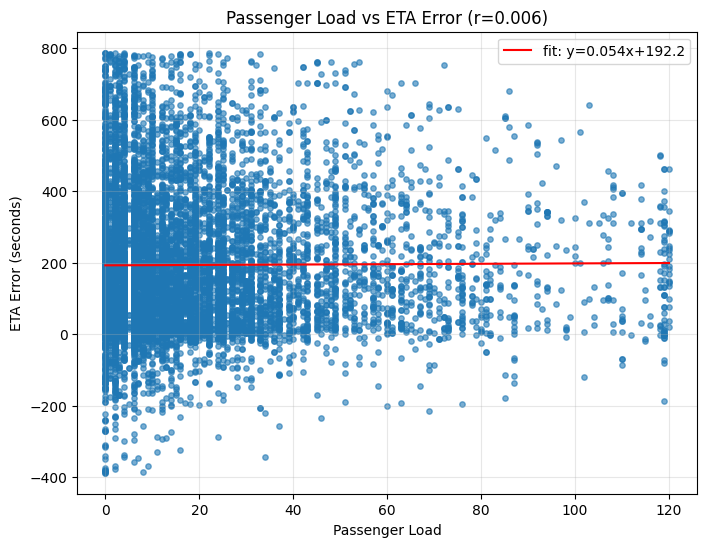

In [211]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6)
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)
x_points = np.linspace(np.nanmin(x), np.nanmax(x), 100)
plt.plot(x_points, linear_model(x_points), color="red", label=f"fit: y={coefficients[0]:.3f}x+{coefficients[1]:.1f}")

r = np.corrcoef(x, y)[0,1]
plt.xlabel("Passenger Load")
plt.ylabel("ETA Error (seconds)")
plt.title(f"Passenger Load vs ETA Error (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [212]:
paired = b_sample[["speed_prev_mps", "eta_error_s"]].dropna()
#paired = paired[paired["speed_prev_mps"] < 40]
x_sample = paired["speed_prev_mps"]
y_sample = paired["eta_error_s"]

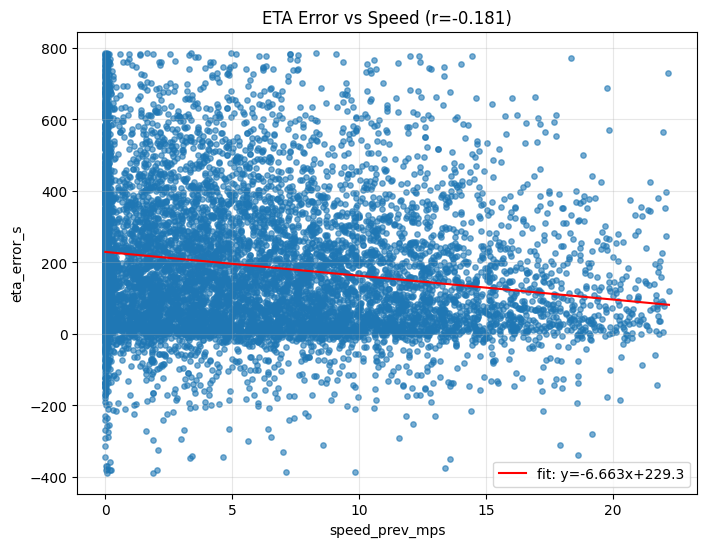

In [213]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6)
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)
x_points = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x_points, linear_model(x_points), color="red", label=f"fit: y={coefficients[0]:.3f}x+{coefficients[1]:.1f}")

r = np.corrcoef(x, y)[0,1]
plt.xlabel("speed_prev_mps")
plt.ylabel("eta_error_s")
plt.title(f"ETA Error vs Speed (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [220]:
paired = b_sample[["speed_1min_mps", "eta_error_s"]].dropna()
paired = paired[paired["speed_1min_mps"] < 30]
x_sample = paired["speed_1min_mps"]
y_sample = paired["eta_error_s"]

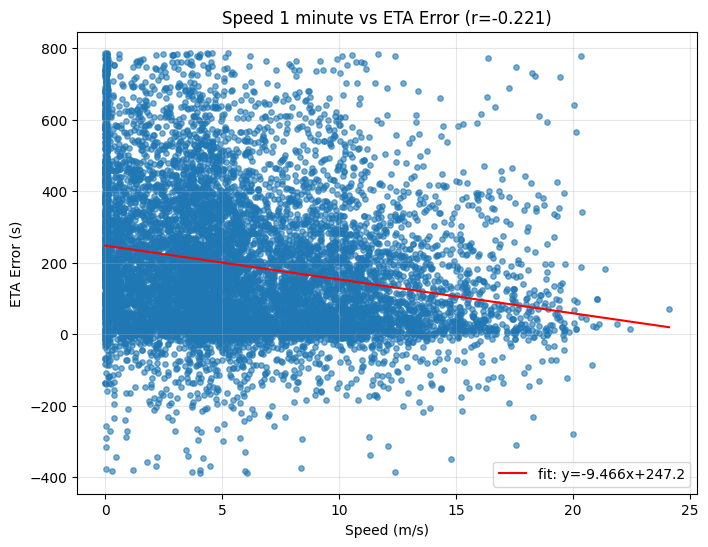

In [221]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6)
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)
x_points = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x_points, linear_model(x_points), color="red", label=f"fit: y={coefficients[0]:.3f}x+{coefficients[1]:.1f}")

r = np.corrcoef(x, y)[0,1]
plt.xlabel("Speed (m/s)")
plt.ylabel("ETA Error (s)")
plt.title(f"Speed 1 minute vs ETA Error (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [224]:
paired = b_sample[["time_of_day_s", "eta_error_s"]].dropna()
x_sample = paired["time_of_day_s"]
x_sample = (x_sample + 86400 - 60*60*12) % (86400)
y_sample = paired["eta_error_s"]
print(x_sample.max(), x_sample.min())

57188 38


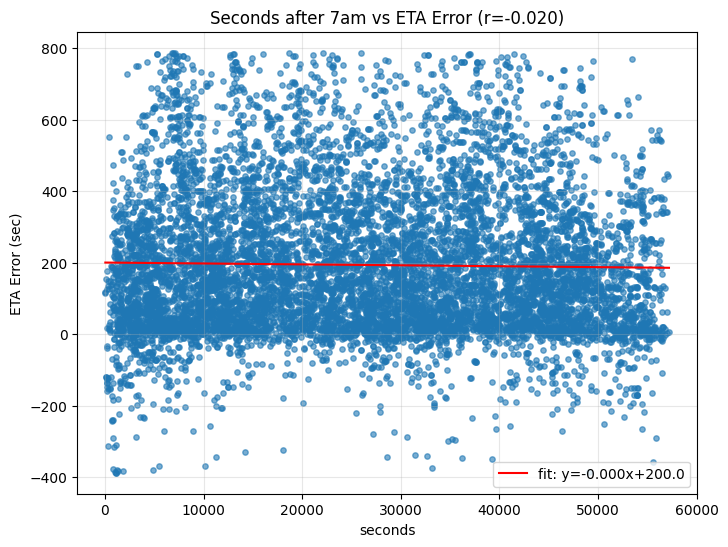

In [225]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6)
coefficients = np.polyfit(x, y, 1)
linear_model = np.poly1d(coefficients)
x_points = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x_points, linear_model(x_points), color="red", label=f"fit: y={coefficients[0]:.3f}x+{coefficients[1]:.1f}")

r = np.corrcoef(x, y)[0,1]
plt.xlabel("seconds")
plt.ylabel("ETA Error (sec)")
plt.title(f"Seconds after 7am vs ETA Error (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

/var/folders/j7/zg72qj2521b4v_sw10nk4ntm0000gn/T/ipykernel_14876/2670053894.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = paired.groupby("bin")["eta_error_s"].mean().astype(float)


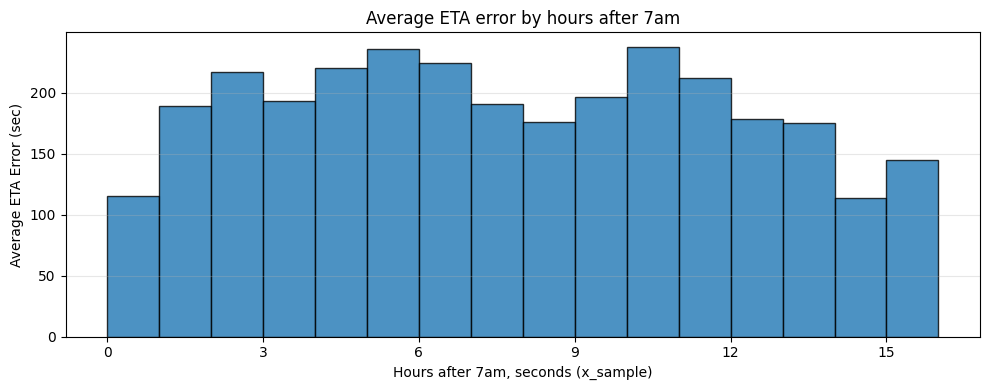

In [228]:
bins = np.linspace(0, 86400, 25)
#we compute mean of bin centers for the histogram
bin_centers = (bins[:-1] + bins[1:]) / 2.0
paired["bin"] = pd.cut(x_sample, bins=bins, labels=bin_centers, include_lowest=True, right=False)
agg = paired.groupby("bin")["eta_error_s"].mean().astype(float)
plt.figure(figsize=(10,4))
x_points = agg.index.astype(float)          
width = bins[1] - bins[0]
plt.bar(x_points, agg.values, width=width, align="center", color="C0", edgecolor="k", alpha=0.8)
plt.xlabel("Hours after 7am, seconds (x_sample)")
plt.ylabel("Average ETA Error (sec)")
plt.title("Average ETA error by hours after 7am")
tick_secs = np.arange(0, 16*3600, 3*3600)
plt.xticks(tick_secs, [f"{int(t/3600)%24}" for t in tick_secs])
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()